# Chapter 5: Build a Structural Causal Model Step-by-Step

In this chapter, we make a causal model from scratch in different steps.

## Build a SCM to Model the Impact of Butterbeer on Happiness in Hogwarts 

The example is taken from the Berkeley's Causality course (https://www.ucbbiostat.com/labs)

### Background

Suppose we are interested in the causal effect of butterbeer consumption on happiness among wizards at Hogwarts. Specifically, we want to know if the average happiness would be higher if all wizards consumed butterbeer or if all wizards did not. From a causal inference perspective, we want to know if there is a connection between butterbeeer consumption and happiness.

<img src="img/ch4/butterBeer_happiness.png" alt="drawing" width="400"/>


As seen in the lecture, we have to first identify the variables (endogenous, exogenous) draw a DAG to formalize our hypotheses and assumptions. Then we need structural equations to build a SCM from the DAG.  

### STEP 1: Identify Variables and Assumptions

We first need to identify the variables $X$ that are interesting and meaningful for the study (endogenous variables) and background (exogenous) variables $U$ that are unmeasured factors not included in $X$ that determine the values that the $X$ variables take. 

- Let $W_1$ be a measure of the student’s pre-exposure characteristic, in this case friendship with Snape. 

- Let $W_2$ be an additional baseline variable, indicating whether the student had permission to travel to Hogsmeade, a location where butterbeer is sold. 

- We consider a binary exposure $A$, indicating consumption of butterbeer $(A = 1)$ or not $(A = 0)$. 

- $Y$ denote the outcome happiness. 


Finally, we suppose having a permission $W_2$ only affects the exposure $A$, but has no direct effect on the happiness $Y$.

The counterfactuals of interest are $(Y_a : a \in \mathcal{A} = \{0, 1\})$. Here, $Y_1$ is the counterfactual happiness if a wizard drank butterbeer and $Y_0$ is the counterfactual happiness if a wizard did not drink butterbeer.




### STEP 2: Create a DAG

This study can be translated into the directed acyclic graph below. The variable $U$ represents the background/unmeasured factors for all the endogenous nodes
Given the DAG, we can build the related structural model M:

- Endogenous Nodes: $X = (W_1, W_2, A, Y )$
- Exogenous (Unmeasured) Nodes: $U = (U_{W1}, U_{W2}, U_A, U_Y ) \sim \mathbb{P}_U$
- Structural Equations $F$

$
F :=
\begin{cases}
     &W_1 = f_{W1}(U_{W1}) \\
     &W_2 = f_{W2}(W_1, U_{W2}) \\ 
     &A = f_A(W_1, W_2, U_A) \\
     &Y = f_Y (W_1, A, U_Y ) 
\end{cases}
$

We specified a model which reflects our limited knowledge of the data generating system. 
We did not place any assumptions on the joint distribution of the exogenous nodes. We made only one exclusion restriction on $W_2$ to $A$. 
Finally, we did not make any assumptions about the functional form of the structural equations.

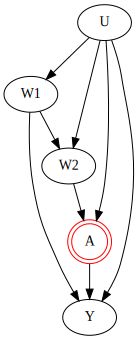

In [ ]:
import graphviz as gr

g = gr.Digraph()
g.edge("U", "W1")
g.edge("U", "W2")
g.edge("U", "A")
g.edge("U", "Y")

g.edge("W1", "W2")
g.edge("W2", "A")
g.edge("W1", "Y")
g.edge("A", "Y")
g.node("A", color="red", shape="doublecircle")
g

### STEP 3: Specify the Causal Question

The next step is to translate the scientific question into a formal causal quantity. In this example, we want to know if the happiness increases with drinking more butterbeer.

Since, we can never know both individual treatment effect (drinking butterbeer or not drinking) because we only observe one of the potential outcomes at each time. So, we calculate the **average treatment effect (ATE)** to answer our causal question.

The average treatment effect (ATE), defined as:

$$
ATE =
\mathbb{E}_{U,X} (Y_1) - \mathbb{E}_{U,X} (Y_0)
= \mathbb{E}_{U,X} [f_Y(W_1,A=1,U_Y)] - \mathbb{E}_{U,X} [f_Y(W_1,A=0,U_Y)]
$$

$ATE$ is the difference in the expected counterfactual happiness if all wizards were to drink butterbeer and the expected counterfactual happiness if all wizards were not to drink butterbeer.

### STEP 4: Look at Observational Data

Because we (clearly) don't have real data for this study we need to generate a dataset. We consider a particular data generating process $\mathbb{P}_{U,X}$. However, there are many data generation process that are compatible with our model, the structural equations $F$. 

First, we also specify the structural equations $F$. 

- Each of the exogenous factors $U$ is drawn independently from the following distributions:

$\begin{cases}
    U_{W1} \sim Uniform(min=0, max=1) \\
    U_{W2} \sim Bernoulli(p=0.5) \\
    U_{A} \sim Normal(\mu=-3, \sigma^2=1) \\
    U_{Y} \sim Normal(\mu=0, \sigma^2=0.3^2)
\end{cases}$

- Let us also specify the structural equations $F$:

$\begin{cases}
     &W_1 = f_{W1}(U_{W1}) = \mathbb{I}[U_{W1} < 0.35] \\
     &W_2 = f_{W2}(W_1, U_{W2}) = W_1 + 2U_{W2} \\ 
     &A = f_A(W_1, W_2, U_A) = \mathbb{I} [(1+W_1+2W_2+U_A) > 0]\\
     &Y = f_Y (W_1, A, U_Y )  = 1+2.5A + 3W_1 -0.25A  W_1 + U_y
\end{cases}$

where $\mathbb{I}$ is the indicator function equal to 1 if the statement in the brackets is true.


<br/><br/>
In this particular data generating system (one of many compatible with our structural causal model), the expectation of the counterfactual outcome is a linear function of the treatment level $a$:

$
\mathbb{E}[Y_a] = \mathbb{E}[1+2.5a + 3W_1 -0.25a  W_1 + U_y] =  
$

$
= 1+2.5a + 3\mathbb{E}[W_1] -0.25a \mathbb{E}[W_1] + \mathbb{E}[U_y]
= 1+2.5a + 3 \underbrace{\mathbb{E}[W_1]}_{0.35} -0.25a \underbrace{\mathbb{E}[W_1]}_{0.35} + \underbrace{\mathbb{E}[U_y]}_{0}
$

$W_1$ is a random variable that specifies how students are grouped based on frienship with Snape.  

$P(W_1=1) = P(\mathbb{I}(U_W <0.35)) = P(U_W < 0.35) = 0.35$

The expected value for $W_1$ is: 

$\mathbb{E}[W_1] = 1 * P(W_1=1) + 0 * P(W_1=0) = 0.35$ 

It means that 35% of students are in friendship with Snape (for sure Slytherin house).








### STEP 5: Obtain the value of the target causal parameter (e.g, ATE): 

In this example, we can retrieve the ATE in a closed form from the SCM $F$.
The value of our target causal parameter (ATE) is:

$
ATE = \mathbb{E}(Y(a=1) - Y(a=0)) = 
$

$
=(1 + 2.5 \cdot 1 + 3 \cdot 0.35 - 0.25 \cdot 1 \cdot 0.35 + 0) - (1 + 2.5 \cdot 0 + 3 \cdot 0.35 - 0.25 \cdot 0 \cdot 0.35 + 0)= 2.4125
$


The ATE means that the expected happiness would be higher if all wizards drink butterbeer compared to the scneario where none of the wizards drink butterbeer.

## Simulate the model in Python

We translate the specific data generating process, which is an element of the causal
model, into a Python simulation.


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

seed = 42
random.seed(seed)
np.random.seed(seed)

n_students = 5000

"""Simulate the background factor"""

#Exogenous variables
Uw1 = np.random.uniform(low=0, high=1, size=n_students)
Uw2 = np.random.binomial(n=1, p=0.5, size=n_students)
Ua = np.random.normal(loc=-3, scale=1, size=n_students)
Uy = np.random.normal(loc=0, scale=0.3, size=n_students)

#Endogenous variables
W1 = (Uw1 <= 0.35).astype(int)
W2 = W1 + 2*Uw2
A = (((1+W1+2*W2+Ua)) >= 0).astype(int)
Y = 1 + 2.5*A + 3*W1 - 0.25*A*W1 + Uy


# Store everything in a dataframe
data = pd.DataFrame(data = 
                    {'W1': W1,
                     'W2': W2,
                     'A': A,
                     'Y': Y})

data.head()

,W1,W2,A,Y
0,0,0,0,0.804414
1,0,0,0,0.969992
2,0,2,1,3.944055
3,0,0,0,1.152629
4,1,3,1,5.761524


Now intervene to generate the counterfactual outcomes

In [ ]:
# Intervene on the butterbeer consumption
A = 1; Y1 = 1 + 2.5*A + 3*W1 - 0.25*A*W1 + Uy
A = 0; Y0 = 1 + 2.5*A + 3*W1 - 0.25*A*W1 + Uy
# Store results
data['Y1'] = Y1
data['Y0'] = Y0
data.head()

,W1,W2,A,Y,Y1,Y0
0,0,0,0,0.804414,3.304414,0.804414
1,0,0,0,0.969992,3.469992,0.969992
2,0,2,1,3.944055,3.944055,1.444055
3,0,0,0,1.152629,3.652629,1.152629
4,1,3,1,5.761524,5.761524,3.511524


We notice that the outcome $Y$ when $A=0$ is equal to the counterfactual outcome $Y0$. Likewise, the outcome $Y$ when $A=1$ is equal to the counterfactual outcome $Y1$.
Given input of the background factors $U$, the structural equations are deterministic.

In [ ]:
ATE = (data['Y1'] - data['Y0']).mean()
ATE

2.41145